# Advanced Regression: Assignment
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. <br>

The company is looking at prospective properties to buy to enter the market.<br>
The company wants to know:
- Which variables are significant in predicting the price of a house, and
- How well those variables describe the price of a house.
## Importing required Libraries and Dataset

In [1]:
# Suppressing warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing libraries for data manipulation
import numpy as np
import pandas as pd

In [3]:
# importing visualization libraries
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# importing model building libraries
from sklearn import metrics
from sklearn import linear_model
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV, train_test_split, KFold, cross_val_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [5]:
# Setting configurations
## setting sns style
sns.set(style="whitegrid")

## suppress SettingWithCopyWarning
pd.options.mode.chained_assignment = None

## To suppress scientific notation
pd.options.display.float_format = "{:.2f}".format

## setting display options
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

### Loading Dataset

In [6]:
# Loading the dataset
housing_price = pd.read_csv('train.csv')
housing_price.shape

(1460, 81)

## Step-1: Data Understanding and Exploration

In [7]:
# print first 5 records of the dataframe
housing_price.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.00,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.00,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.00,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.00,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.00,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.00,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.00,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.00,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.00,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.00,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.00,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.00,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.00,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.00,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.00,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
# information about the dataframe
housing_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
# Summary/Descriptive statistics of all numeric columns
housing_price.describe([0.01, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.00,1460.00,1201.00,1460.00,1460.00,1460.00,1460.00,1460.00,1452.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1379.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00
mean,730.50,56.90,70.05,10516.83,6.10,5.58,1971.27,1984.87,103.69,443.64,46.55,567.24,1057.43,1162.63,346.99,5.84,1515.46,0.43,0.06,1.57,0.38,2.87,1.05,6.52,0.61,1978.51,1.77,472.98,94.24,46.66,21.95,3.41,15.06,2.76,43.49,6.32,2007.82,180921.20
std,421.61,42.30,24.28,9981.26,1.38,1.11,30.20,20.65,181.07,456.10,161.32,441.87,438.71,386.59,436.53,48.62,525.48,0.52,0.24,0.55,0.50,0.82,0.22,1.63,0.64,24.69,0.75,213.80,125.34,66.26,61.12,29.32,55.76,40.18,496.12,2.70,1.33,79442.50
min,1.00,20.00,21.00,1300.00,1.00,1.00,1872.00,1950.00,0.00,0.00,0.00,0.00,0.00,334.00,0.00,0.00,334.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,1900.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,2006.00,34900.00
1%,15.59,20.00,21.00,1680.00,3.00,3.00,1899.18,1950.00,0.00,0.00,0.00,0.00,0.00,520.00,0.00,0.00,692.18,0.00,0.00,1.00,0.00,1.00,1.00,3.00,0.00,1916.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,2006.00,61815.97
10%,146.90,20.00,44.00,5000.00,5.00,5.00,1924.90,1950.00,0.00,0.00,0.00,74.90,636.90,756.90,0.00,0.00,912.00,0.00,0.00,1.00,0.00,2.00,1.00,5.00,0.00,1945.00,1.00,240.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,2006.00,106475.00
25%,365.75,20.00,59.00,7553.50,5.00,5.00,1954.00,1967.00,0.00,0.00,0.00,223.00,795.75,882.00,0.00,0.00,1129.50,0.00,0.00,1.00,0.00,2.00,1.00,5.00,0.00,1961.00,1.00,334.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00,2007.00,129975.00
50%,730.50,50.00,69.00,9478.50,6.00,5.00,1973.00,1994.00,0.00,383.50,0.00,477.50,991.50,1087.00,0.00,0.00,1464.00,0.00,0.00,2.00,0.00,3.00,1.00,6.00,1.00,1980.00,2.00,480.00,0.00,25.00,0.00,0.00,0.00,0.00,0.00,6.00,2008.00,163000.00
75%,1095.25,70.00,80.00,11601.50,7.00,6.00,2000.00,2004.00,166.00,712.25,0.00,808.00,1298.25,1391.25,728.00,0.00,1776.75,1.00,0.00,2.00,1.00,3.00,1.00,7.00,1.00,2002.00,2.00,576.00,168.00,68.00,0.00,0.00,0.00,0.00,0.00,8.00,2009.00,214000.00
90%,1314.10,120.00,96.00,14381.70,8.00,7.00,2006.00,2006.00,335.00,1065.50,117.20,1232.00,1602.20,1680.00,954.20,0.00,2158.30,1.00,0.00,2.00,1.00,4.00,1.00,9.00,1.00,2006.00,3.00,757.10,262.00,130.00,112.00,0.00,0.00,0.00,0.00,10.00,2010.00,278000.00


#### Target Variable: SalePrice

In [10]:
# Summary statistics for SalePrice column
housing_price['SalePrice'].describe([0.01, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99])

count     1460.00
mean    180921.20
std      79442.50
min      34900.00
1%       61815.97
10%     106475.00
25%     129975.00
50%     163000.00
75%     214000.00
90%     278000.00
99%     442567.01
max     755000.00
Name: SalePrice, dtype: float64

## Step-2: Data Cleaning
Dropping Column Id since its add no value to our analysis and is redundant.

In [11]:
# Dropping Id column as it is redundant
housing_price.drop(['Id'], axis=1, inplace=True)

### Treating Null Values

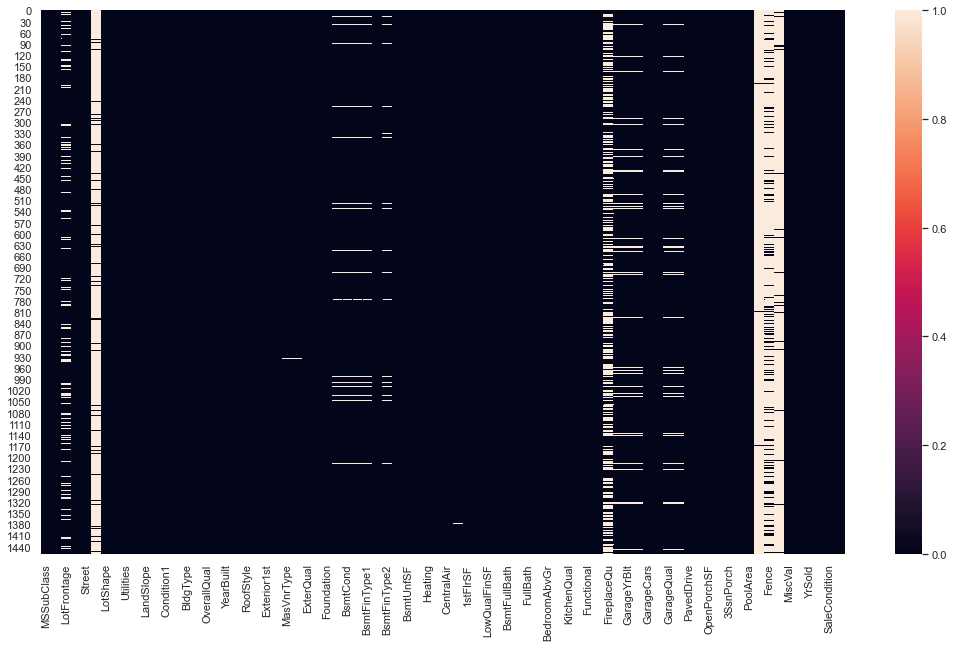

In [12]:
# Plotting heatmap the null values across the features
plt.figure(figsize=(18,10))
sns.heatmap(data=housing_price.isnull())
plt.show()

##### Calculating Null Values

In [13]:
# calculating the null values count and percentage
total = housing_price.isnull().sum().sort_values(ascending=False)
percent = round(100 * (housing_price.isnull().sum()/len(housing_price.index)), 2).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
FireplaceQu,690,47.26
LotFrontage,259,17.74
GarageType,81,5.55
GarageCond,81,5.55
GarageFinish,81,5.55
GarageQual,81,5.55


#### Imputing Null values for Categorical features

In [14]:
# checking null values in all categorical variables
categorical_with_null = housing_price.select_dtypes(include='object').isnull().sum()[
    housing_price.select_dtypes(include='object').isnull().sum() > 0
].sort_values(ascending=False)
categorical_with_null

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
GarageCond        81
GarageQual        81
GarageFinish      81
GarageType        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrType         8
Electrical         1
dtype: int64

In [15]:
# columns with null values
categorical_with_null.index

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageCond',
       'GarageQual', 'GarageFinish', 'GarageType', 'BsmtFinType2',
       'BsmtExposure', 'BsmtFinType1', 'BsmtCond', 'BsmtQual', 'MasVnrType',
       'Electrical'],
      dtype='object')

##### Imputing null values as None

In [16]:
# Filling all Null and NaN values as None
for col in categorical_with_null.index:
    housing_price[col] = housing_price[col].fillna('None')

In [17]:
# Checking if any columns have null values
housing_price.select_dtypes(include='object').isnull().sum()[housing_price.select_dtypes(include='object').isnull().sum() > 0]

Series([], dtype: int64)

##### Removing Skewed Categorical Variables
Removing Categorical features that have a single values for more than 85% of the total values.

In [18]:
# Selecting 85% value as the criteria for dropping skewed variables
housing_price.shape[0] * 0.85

1241.0

In [19]:
# Method to get column names that are skewed to single values for more than 85%
def get_highly_skewed_columns():
    categorical_cols = housing_price.select_dtypes(include=['object'])
    column_list = [col for col in categorical_cols if housing_price[col].value_counts().max() >= 1241]
    return column_list

cols_tobe_removed = get_highly_skewed_columns()
print(cols_tobe_removed, '\n', 'Number of Columns to be removed - ', len(cols_tobe_removed))

['Street', 'Alley', 'LandContour', 'Utilities', 'LandSlope', 'Condition1', 'Condition2', 'RoofMatl', 'ExterCond', 'BsmtCond', 'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'MiscFeature', 'SaleType'] 
 Number of Columns to be removed -  21


In [20]:
# dropping all skewed categorcial variables
housing_price.drop(cols_tobe_removed, axis=1, inplace=True)
housing_price.shape

(1460, 59)

In [21]:
# once again check for null values in all categorical columns
housing_price.select_dtypes(include='object').isnull().sum()[
    housing_price.select_dtypes(include='object').isnull().sum() > 0
]

Series([], dtype: int64)

##### Removing Skewed Numeric Variables
Removing numeric features that have a single values for more than 85% of the total values.

In [22]:
# checking null values for numerical features
housing_price.select_dtypes(include=['int64', 'float64']).isnull().sum()[
    housing_price.select_dtypes(include=['int64', 'float64']).isnull().sum() > 0
]

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

Incase of LotFrontage feature, imputing might add bias since 17% values are missing and hence dropping it.

In [23]:
# dropping LotFrontage
housing_price.drop("LotFrontage", axis=1, inplace=True)

In [24]:
# imputing the columns with their median values
housing_price['MasVnrArea'] = housing_price['MasVnrArea'].fillna(housing_price["MasVnrArea"].median())
housing_price['GarageYrBlt'] = housing_price['GarageYrBlt'].fillna(housing_price["GarageYrBlt"].median())

In [25]:
# checking for null again
housing_price.select_dtypes(include=['int64', 'float64']).isnull().sum()[
    housing_price.select_dtypes(include=['int64', 'float64']).isnull().sum() > 0
]

Series([], dtype: int64)

##### Transforming date variables

In [26]:
# calculating the houses age by calculating difference with the current year
housing_price['YearBuilt'] = pd.datetime.now().year - housing_price['YearBuilt']
housing_price['YearRemodAdd'] = pd.datetime.now().year - housing_price['YearRemodAdd']
housing_price['GarageYrBlt'] = pd.datetime.now().year - housing_price['GarageYrBlt']
housing_price['YrSold'] = pd.datetime.now().year - housing_price['YrSold']

### Removing Duplicate Records

In [27]:
# shape of dataframe
housing_price.shape

(1460, 58)

In [28]:
# dropping duplicate records from the dataframe
housing_price.drop_duplicates(inplace=True)

In [29]:
# shape of the dataframe
housing_price.shape

(1460, 58)

We can observe that there are __NO__ duplicate records found.

### Removing Outliers

In [30]:
# segregating numerical columns from the dataframe
numerical_columns = housing_price.select_dtypes(exclude='object').columns
print('Numerical columns - ', len(numerical_columns))
numerical_columns

Numerical columns -  36


Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [31]:
# segregating categorical columns from the dataframe
categorical_columns = housing_price.select_dtypes(include='object').columns
print('Caegorical columns - ', len(categorical_columns))
categorical_columns

Caegorical columns -  22


Index(['MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'BldgType',
       'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
       'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'Fence', 'SaleCondition'],
      dtype='object')

We can observe that some of features in numerical columns are categorical in nature.<br>
Hence printing unique values to identify the categotical nature.

In [32]:
# printing uniques values from the list to identify categorical features from numerical list
housing_price[numerical_columns].nunique().sort_values()

HalfBath            3
BsmtHalfBath        3
FullBath            4
Fireplaces          4
KitchenAbvGr        4
BsmtFullBath        4
GarageCars          5
YrSold              5
PoolArea            8
BedroomAbvGr        8
OverallCond         9
OverallQual        10
MoSold             12
TotRmsAbvGrd       12
MSSubClass         15
3SsnPorch          20
MiscVal            21
LowQualFinSF       24
YearRemodAdd       61
ScreenPorch        76
GarageYrBlt        97
YearBuilt         112
EnclosedPorch     120
BsmtFinSF2        144
OpenPorchSF       202
WoodDeckSF        274
MasVnrArea        327
2ndFlrSF          417
GarageArea        441
BsmtFinSF1        637
SalePrice         663
TotalBsmtSF       721
1stFlrSF          753
BsmtUnfSF         780
GrLivArea         861
LotArea          1073
dtype: int64

We can observe that 14 columns are categorical in nature even though they are numerical. <br>
Hence converting them to object type.

In [33]:
# converting from int type to object to treat the variables as categorical
housing_price['MSSubClass'] = housing_price['MSSubClass'].astype('object')
housing_price['OverallQual'] = housing_price['OverallQual'].astype('object')
housing_price['OverallCond'] = housing_price['OverallCond'].astype('object')
housing_price['BsmtFullBath'] = housing_price['BsmtFullBath'].astype('object')
housing_price['BsmtHalfBath'] = housing_price['BsmtHalfBath'].astype('object')
housing_price['FullBath'] = housing_price['FullBath'].astype('object')
housing_price['HalfBath'] = housing_price['HalfBath'].astype('object')
housing_price['BedroomAbvGr'] = housing_price['BedroomAbvGr'].astype('object')
housing_price['KitchenAbvGr'] = housing_price['KitchenAbvGr'].astype('object')
housing_price['TotRmsAbvGrd'] = housing_price['TotRmsAbvGrd'].astype('object')
housing_price['Fireplaces'] = housing_price['Fireplaces'].astype('object')
housing_price['GarageCars'] = housing_price['GarageCars'].astype('object')
housing_price['YrSold'] = housing_price['GarageCars'].astype('object')
housing_price['MoSold'] = housing_price['GarageCars'].astype('object')

In [34]:
# checking for numerical columns again
numerical_columns = housing_price.select_dtypes(exclude='object').columns
print("Length: ", len(numerical_columns))
numerical_columns

Length:  22


Index(['LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'SalePrice'],
      dtype='object')

In [35]:
# checking for numerical columns again
categorical_columns = housing_price.select_dtypes(include='object').columns
print("Length: ", len(categorical_columns))
categorical_columns

Length:  36


Index(['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'Foundation',
       'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageCars', 'Fence', 'MoSold', 'YrSold',
       'SaleCondition'],
      dtype='object')

Removing YearBuilt and YearRemodAdd as they are not continous.

In [36]:
numerical_columns = list(numerical_columns)
numerical_columns.remove('YearBuilt')
numerical_columns.remove('YearRemodAdd')

In [37]:
len(numerical_columns)

20

#### Plotting Boxplots
Before removing outliers

In [38]:
def plot_boxplot(numerical_columns):
    plt.figure(figsize=(19, 20))
    i = 1
    plot_size = (len(numerical_columns)//3) + 1
    for col in numerical_columns:
        plt.subplot(plot_size, 3, i)
        sns.boxplot(y=col, data=housing_price)
        i += 1

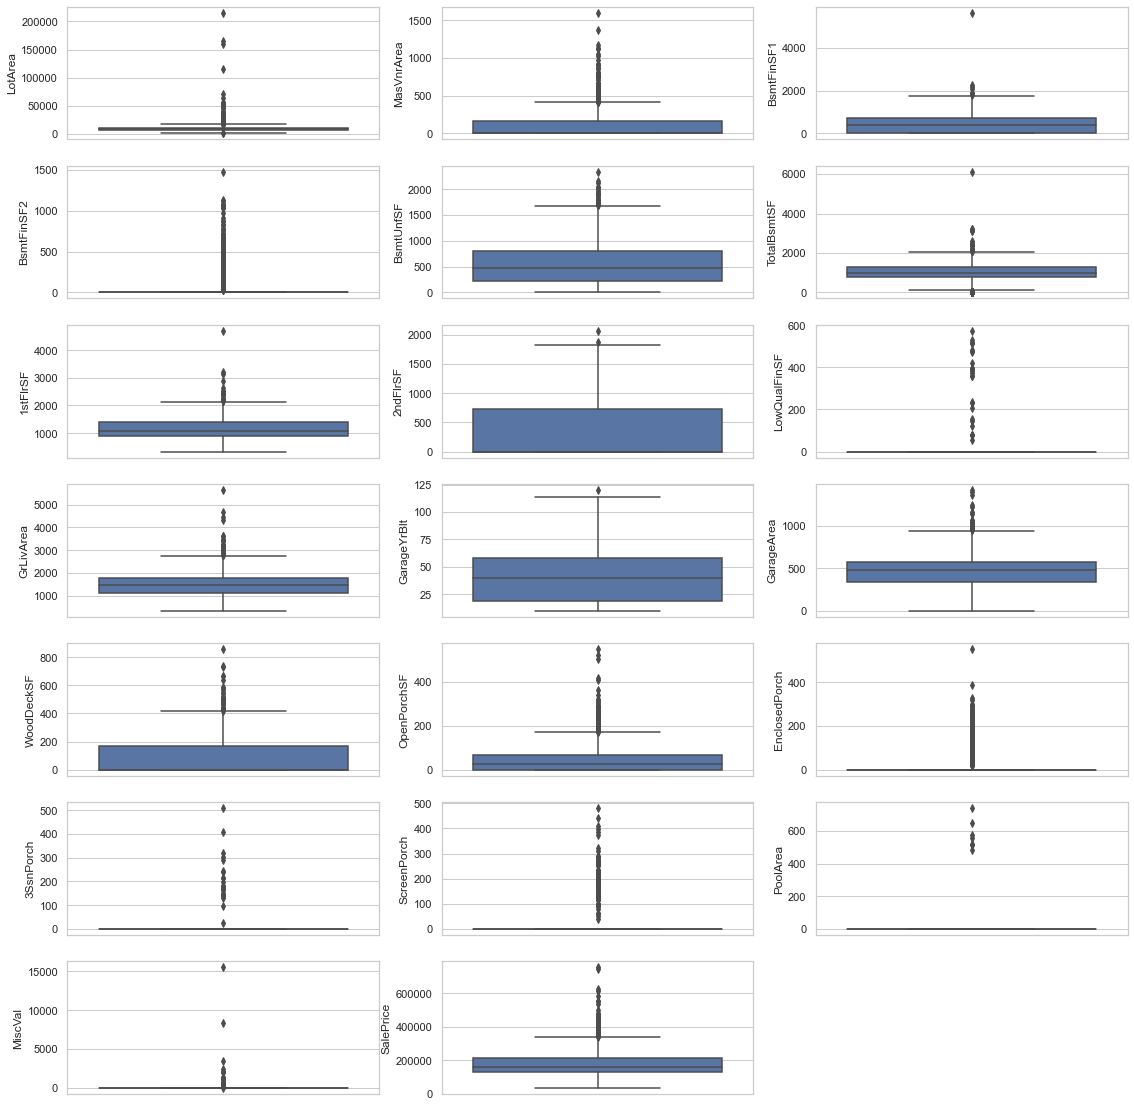

In [39]:
plot_boxplot(numerical_columns)

We can observe that in most of the features there is a clear presence of outliers.<br>
Proceeding to remove outliers.

In [40]:
# shape of dataframe before removing outliers
housing_price.shape

(1460, 58)

Defining a function to remove outliers from passed dataframe against the numerical features

In [41]:
# function to remove outliers from the passed dataframe
def remove_outliers(df):
    for col in numerical_columns:
        Q1 = df[col].quantile(0.01)
        Q3 = df[col].quantile(0.99)
        IQR = Q3 - Q1
        df = df[(df[col] >= (Q1 - (1.5*IQR))) & (df[col] <= (Q3 + (1.5*IQR)))]
    return df

In [42]:
# Calling funtion to remove outliers
housing_price = remove_outliers(housing_price)

In [43]:
# shape of dataframe after removing outliers
housing_price.shape

(1441, 58)

##### Plotting boxplot after removing outliers

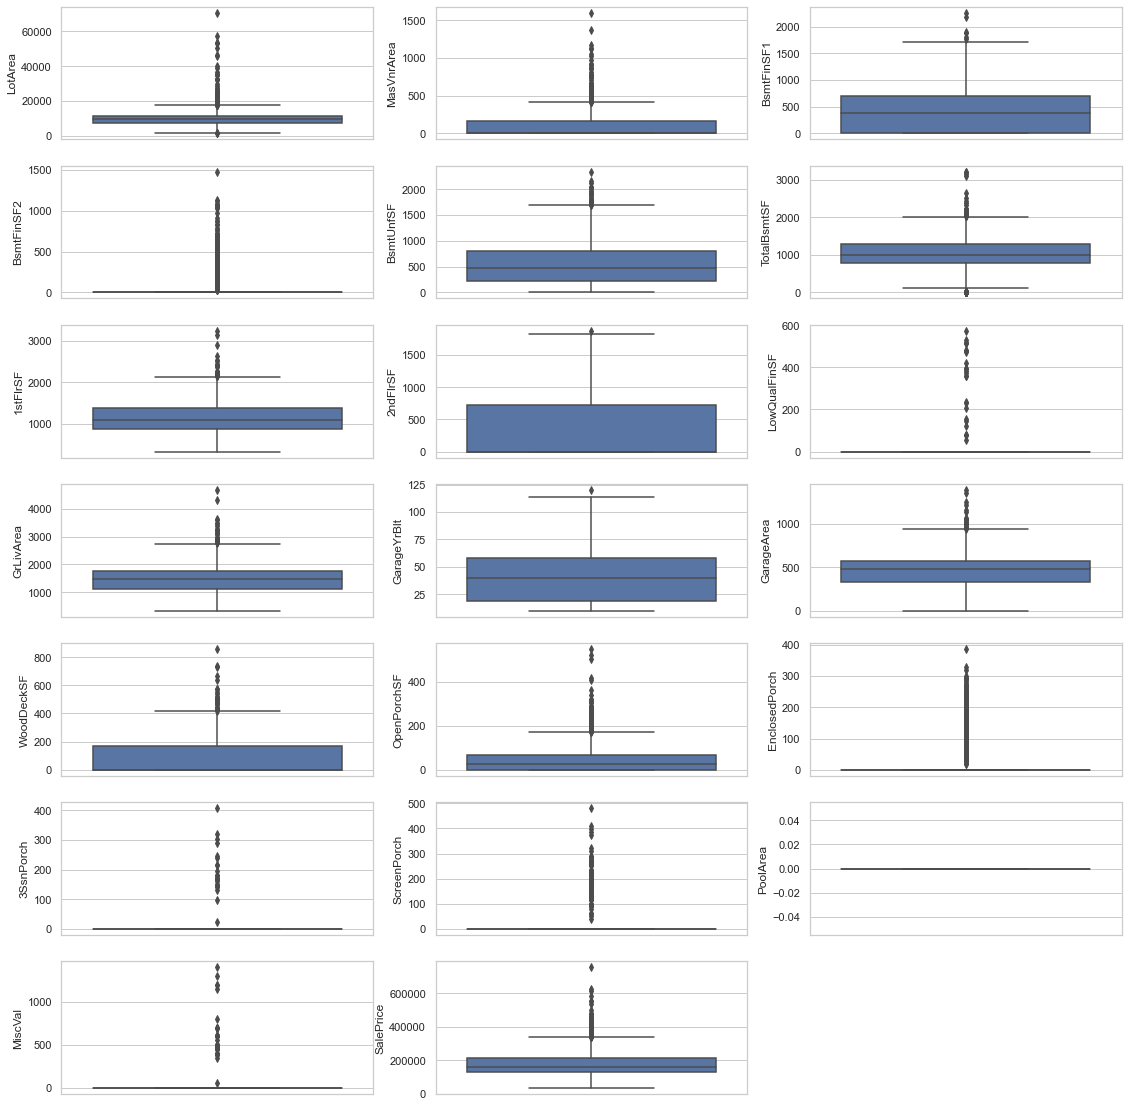

In [44]:
plot_boxplot(numerical_columns)

## Step-3: Data Visualization
### Target Variable - SalePrice

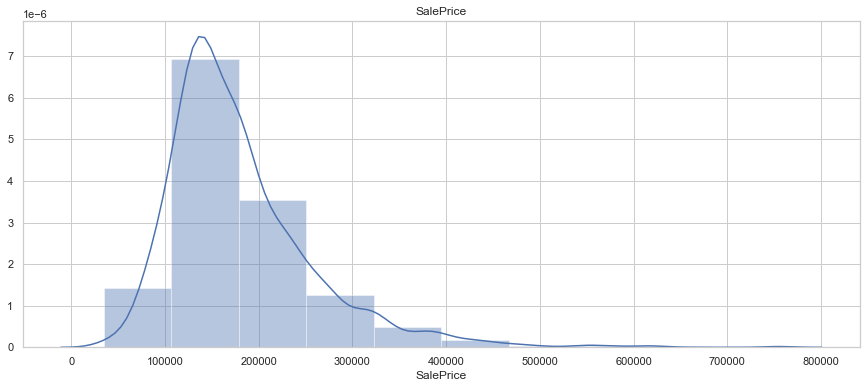

In [45]:
# plotting distribution plot for the target variable
plt.figure(figsize=(15, 6))
plt.title('SalePrice')
sns.distplot(housing_price['SalePrice'], bins=10)
plt.show()

Performing log Transformation to the target variable.

In [46]:
# applying log transformation
housing_price['SalePrice'] = np.log1p(housing_price['SalePrice'])

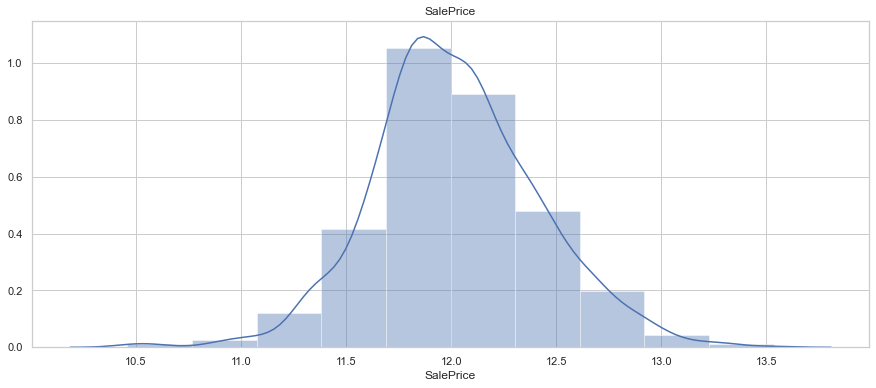

In [47]:
# plotting distribution plot for the target variable after Log transformation
plt.figure(figsize=(15, 6))
plt.title('SalePrice')
sns.distplot(housing_price['SalePrice'], bins=10)
plt.show()

We can observe that the Salr price is now not left skewed after log transformation.
#### Numerical Feature analysis

<Figure size 720x360 with 0 Axes>

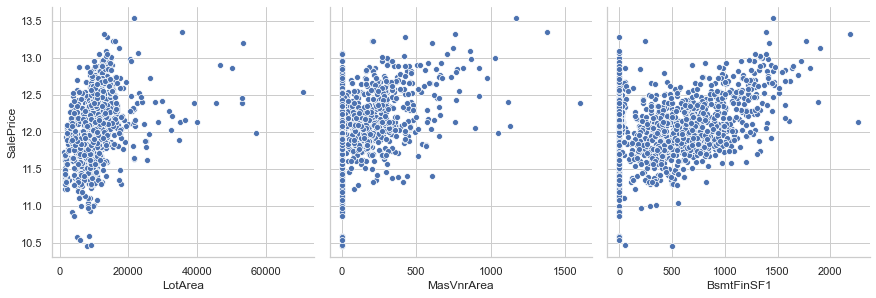

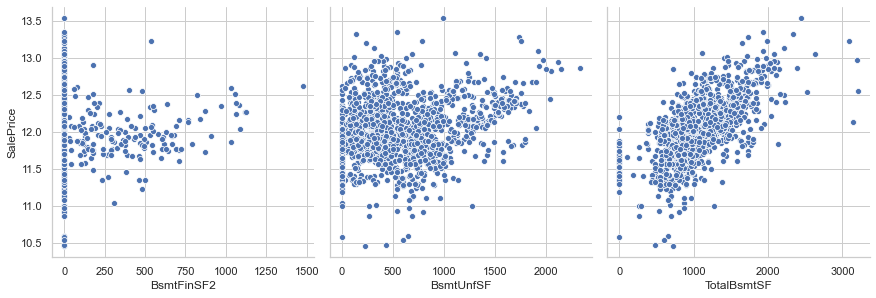

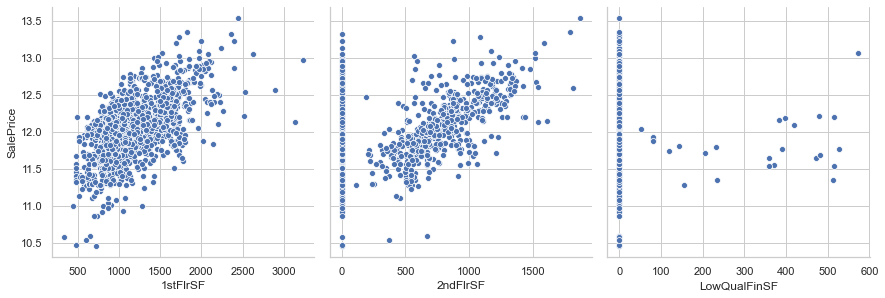

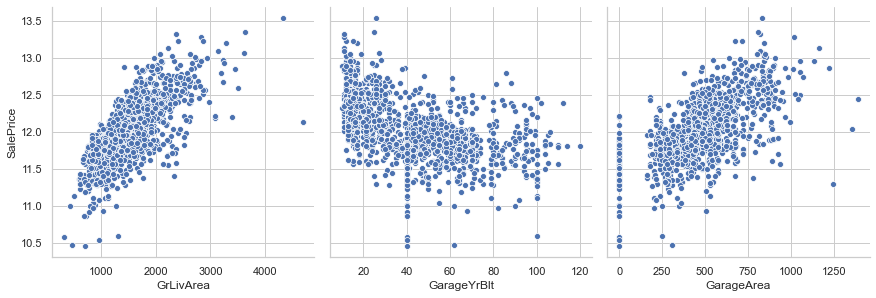

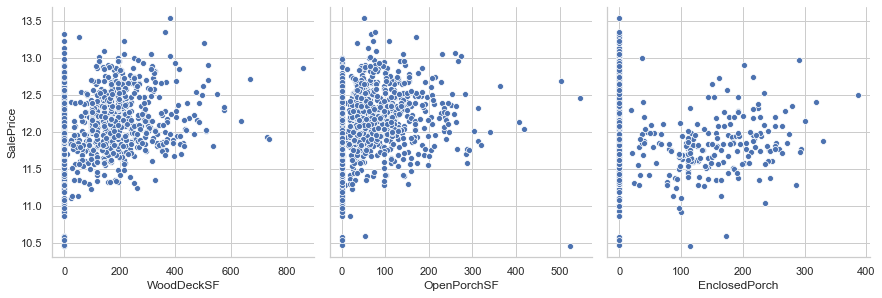

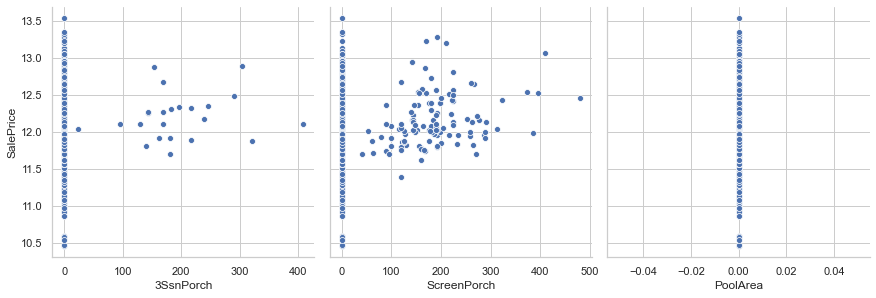

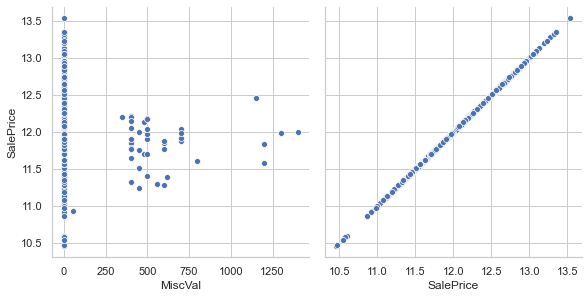

In [48]:
# plotting for numerical columns
plt.figure(figsize=(10,5))
for i in range(0, len(numerical_columns), 3):
    sns.pairplot(housing_price, x_vars=numerical_columns[i:i+3], y_vars='SalePrice', height=4, aspect=1, kind='scatter')
plt.show()

We can observe that most of the features are __linearly related__ to the target variable.

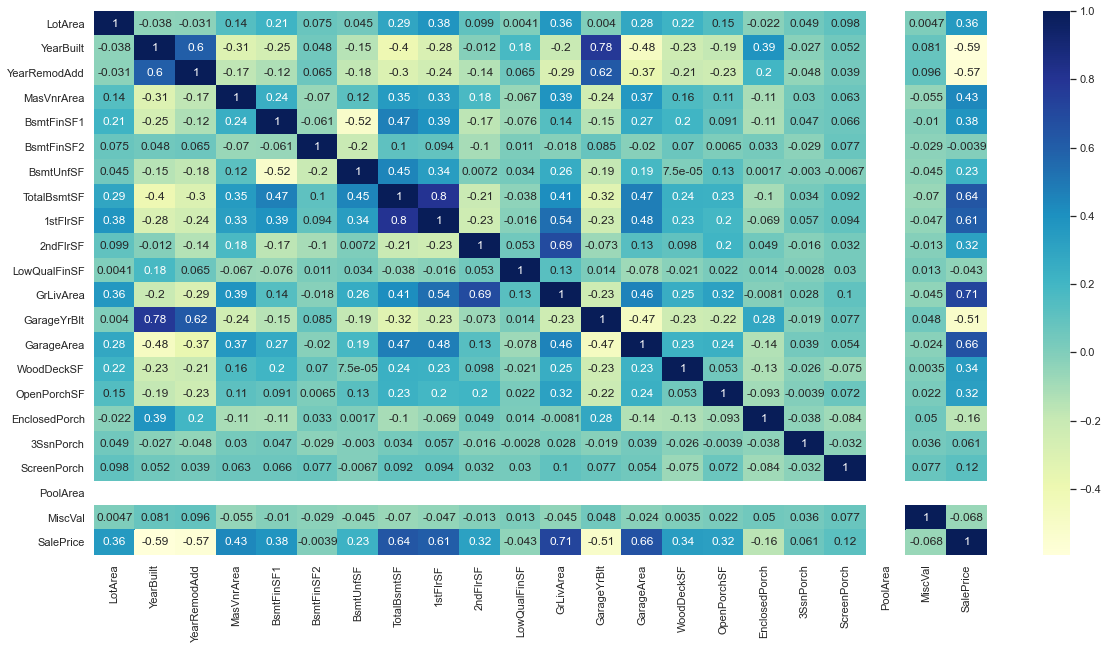

In [49]:
# plotting correlations between the features in the dataframe
plt.figure(figsize = (20, 10))
sns.heatmap(housing_price.corr(), annot=True, cmap="YlGnBu")
plt.show()

Analyzing Categorical variables

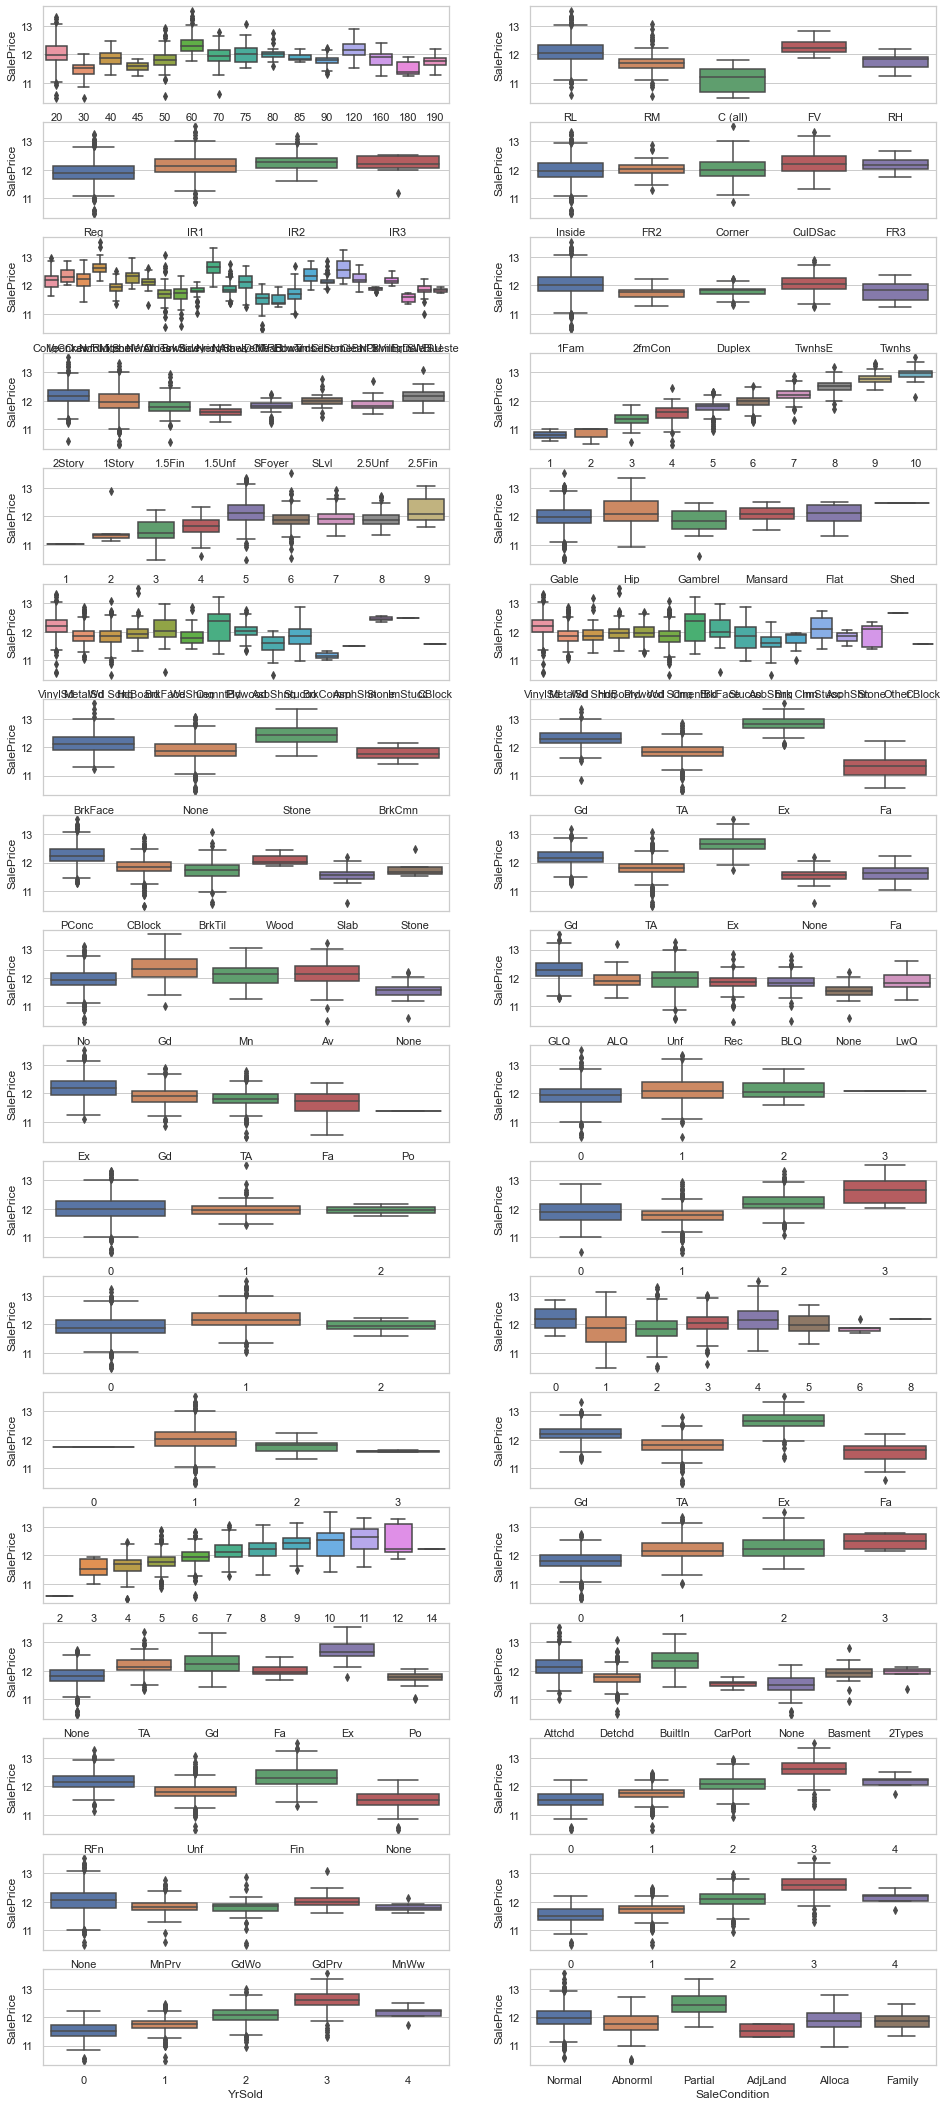

In [50]:
# plotting box plots for categorical variables 
plt.figure(figsize=(16, 40))
plot_size = (len(categorical_columns)//2) + 1
for i in range(len(categorical_columns)):
    plt.subplot(plot_size, 2, i+1)
    sns.boxplot(x=categorical_columns[i], y='SalePrice', data=housing_price)
plt.show()

## Step-4: Data Preparation
### Creating Dummy Variables

In [51]:
categorical_columns

Index(['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'Foundation',
       'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageCars', 'Fence', 'MoSold', 'YrSold',
       'SaleCondition'],
      dtype='object')

In [52]:
for col in categorical_columns:
    dummies = pd.get_dummies(housing_price[col], drop_first=True)
    # adding prefix to dummies for easy identification
    dummies = dummies.add_prefix(f'{col}_')
    housing_price = pd.concat([housing_price, dummies], axis=1)
    housing_price.drop(col, axis=1, inplace=True)

In [53]:
housing_price.shape

(1441, 234)

In [54]:
housing_price.head()

,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,...,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_3,BsmtHalfBath_1,BsmtHalfBath_2,FullBath_1,FullBath_2,FullBath_3,HalfBath_1,HalfBath_2,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,KitchenAbvGr_1,KitchenAbvGr_2,KitchenAbvGr_3,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,TotRmsAbvGrd_3,TotRmsAbvGrd_4,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,TotRmsAbvGrd_10,TotRmsAbvGrd_11,TotRmsAbvGrd_12,TotRmsAbvGrd_14,Fireplaces_1,Fireplaces_2,Fireplaces_3,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageCars_1,GarageCars_2,GarageCars_3,GarageCars_4,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MoSold_1,MoSold_2,MoSold_3,MoSold_4,YrSold_1,YrSold_2,YrSold_3,YrSold_4,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,8450,17,17,196.00,706,0,150,856,856,854,0,1710,17.00,548,0,61,0,0,0,0,0,12.25,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0
1,9600,44,44,0.00,978,0,284,1262,1262,0,0,1262,44.00,460,298,0,0,0,0,0,0,12.11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,...,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0
2,11250,19,18,162.00,486,0,434,920,920,866,0,1786,19.00,608,0,42,0,0,0,0,0,12.32,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,

### Train Test split

In [55]:
# setting random seed
np.random.seed(0)

In [56]:
# performing a train test split of 75:25 ratio
df_train, df_test = train_test_split(housing_price, train_size=0.75, test_size=0.25, random_state=100)
print("train set size: ", df_train.shape)
print("test set size: ", df_test.shape)

train set size:  (1080, 234)
test set size:  (361, 234)


#### Rescaling Data

In [57]:
# Instantiating StandardScaler class 
scaler = StandardScaler()

In [58]:
# adding back year fields
numerical_columns.append('YearBuilt')
numerical_columns.append('YearRemodAdd')
# removing SalePrice as already log transformation is done
numerical_columns.remove('SalePrice')

In [59]:
# scaling only continous features
numerical_columns

['LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'YearBuilt',
 'YearRemodAdd']

In [60]:
# scaling the train set for continous features
df_train[numerical_columns] = scaler.fit_transform(df_train[numerical_columns])

In [61]:
df_train.head()

,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,...,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_3,BsmtHalfBath_1,BsmtHalfBath_2,FullBath_1,FullBath_2,FullBath_3,HalfBath_1,HalfBath_2,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,KitchenAbvGr_1,KitchenAbvGr_2,KitchenAbvGr_3,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,TotRmsAbvGrd_3,TotRmsAbvGrd_4,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,TotRmsAbvGrd_10,TotRmsAbvGrd_11,TotRmsAbvGrd_12,TotRmsAbvGrd_14,Fireplaces_1,Fireplaces_2,Fireplaces_3,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageCars_1,GarageCars_2,GarageCars_3,GarageCars_4,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MoSold_1,MoSold_2,MoSold_3,MoSold_4,YrSold_1,YrSold_2,YrSold_3,YrSold_4,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1017,-0.74,-0.42,0.04,-0.55,1.43,-0.28,-0.87,0.44,0.60,-0.81,-0.13,-0.29,-0.22,0.48,-0.23,-0.72,-0.37,-0.12,-0.27,0.00,-0.15,12.14,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,...,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0
1364,-1.20,-1.11,-0.98,-0.55,-1.03,-0.28,0.08,-1.12,-1.79,0.59,1.42,-0.62,-1.10,0.07,-0.75,1.77,-0.37,-0.12,-0.27,0.00,-0.15,11.88,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,...,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0
69,0.98,0.61,1.5

##### Scaling test data set

In [62]:
df_test[numerical_columns] = scaler.transform(df_test[numerical_columns])

In [63]:
df_test.head()

,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,...,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_3,BsmtHalfBath_1,BsmtHalfBath_2,FullBath_1,FullBath_2,FullBath_3,HalfBath_1,HalfBath_2,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,KitchenAbvGr_1,KitchenAbvGr_2,KitchenAbvGr_3,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,TotRmsAbvGrd_3,TotRmsAbvGrd_4,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,TotRmsAbvGrd_10,TotRmsAbvGrd_11,TotRmsAbvGrd_12,TotRmsAbvGrd_14,Fireplaces_1,Fireplaces_2,Fireplaces_3,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageCars_1,GarageCars_2,GarageCars_3,GarageCars_4,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MoSold_1,MoSold_2,MoSold_3,MoSold_4,YrSold_1,YrSold_2,YrSold_3,YrSold_4,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
218,0.99,1.07,-1.03,1.18,-0.22,-0.28,-0.25,-0.62,-0.03,1.10,-0.13,0.93,1.67,-0.16,-0.75,1.07,2.12,-0.12,-0.27,0.00,-0.15,12.65,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,...,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0
30,-0.26,1.70,1.70,-0.55,-1.03,-0.28,0.19,-0.99,-1.42,0.75,-0.13,-0.38,2.47,-1.03,-0.75,0.09,2.49,-0.12,-0.27,0.00,-0.15,10.60,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
548,-0.31,0.54,-0.49,-0.

##### Splitting Dependent and Independent features
Train Set

In [64]:
# Splitting Dependent and Independent features for Train set
y_train = df_train.pop('SalePrice')
X_train = df_train
print(X_train.shape)
y_train.head()

(1080, 233)


1017   12.14
1364   11.88
69     12.32
713    11.77
700    12.65
Name: SalePrice, dtype: float64

Test Set

In [65]:
# Splitting Dependent and Independent features for Test set
y_test = df_test.pop('SalePrice')
X_test = df_test
print(X_test.shape)
y_test.head()

(361, 233)


218    12.65
30     10.60
548    11.74
634    11.88
1362   11.56
Name: SalePrice, dtype: float64

## Step-5: Model Building
### Building and Training Model using RFE

In [66]:
# Instantiating Linear Regression model
lm = LinearRegression()

# Fitting Line
lm.fit(X_train, y_train)

LinearRegression()

In [67]:
# Running RFE to output 50 variables
rfe = RFE(lm, n_features_to_select=50)
rfe = rfe.fit(X_train, y_train)

In [68]:
# selected Variables
list(zip(X_train.columns, rfe.ranking_, rfe.support_))

[('LotArea', 103, False),
 ('YearBuilt', 33, False),
 ('YearRemodAdd', 91, False),
 ('MasVnrArea', 165, False),
 ('BsmtFinSF1', 1, True),
 ('BsmtFinSF2', 1, True),
 ('BsmtUnfSF', 1, True),
 ('TotalBsmtSF', 1, True),
 ('1stFlrSF', 1, True),
 ('2ndFlrSF', 1, True),
 ('LowQualFinSF', 1, True),
 ('GrLivArea', 1, True),
 ('GarageYrBlt', 179, False),
 ('GarageArea', 88, False),
 ('WoodDeckSF', 133, False),
 ('OpenPorchSF', 163, False),
 ('EnclosedPorch', 145, False),
 ('3SsnPorch', 159, False),
 ('ScreenPorch', 131, False),
 ('PoolArea', 3, False),
 ('MiscVal', 184, False),
 ('MSSubClass_30', 59, False),
 ('MSSubClass_40', 62, False),
 ('MSSubClass_45', 86, False),
 ('MSSubClass_50', 155, False),
 ('MSSubClass_60', 147, False),
 ('MSSubClass_70', 156, False),
 ('MSSubClass_75', 50, False),
 ('MSSubClass_80', 135, False),
 ('MSSubClass_85', 182, False),
 ('MSSubClass_90', 1, True),
 ('MSSubClass_120', 79, False),
 ('MSSubClass_160', 32, False),
 ('MSSubClass_180', 41, False),
 ('MSSubClass_19

In [69]:
# Columns where rfe support is true
X_train.columns[rfe.support_]

Index(['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'MSSubClass_90',
       'BldgType_Duplex', 'OverallQual_2', 'OverallQual_3', 'OverallQual_4',
       'OverallQual_5', 'OverallQual_6', 'OverallQual_7', 'OverallQual_8',
       'OverallQual_9', 'OverallQual_10', 'OverallCond_2', 'OverallCond_3',
       'OverallCond_4', 'OverallCond_5', 'OverallCond_6', 'OverallCond_7',
       'OverallCond_8', 'OverallCond_9', 'Exterior1st_CBlock',
       'Exterior2nd_CBlock', 'BsmtQual_None', 'BsmtFinType1_None',
       'BedroomAbvGr_8', 'TotRmsAbvGrd_12', 'TotRmsAbvGrd_14', 'Fireplaces_1',
       'Fireplaces_2', 'Fireplaces_3', 'FireplaceQu_None', 'GarageType_None',
       'GarageFinish_None', 'GarageCars_1', 'GarageCars_2', 'GarageCars_3',
       'GarageCars_4', 'MoSold_1', 'MoSold_2', 'MoSold_3', 'MoSold_4',
       'YrSold_2', 'YrSold_3'],
      dtype='object')

##### Selecting RFE selected columns for Test and Train set

In [70]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_test_rfe = X_test[X_test.columns[rfe.support_]]
print("Train set after RFE: ", X_train_rfe.shape)
print("Test set after RFE: ", X_test_rfe.shape)

Train set after RFE:  (1080, 50)
Test set after RFE:  (361, 50)


#### Builing a Simple Linear Model
Function to calculate the VIF

In [71]:
# defining a function to calculate VIF
def calculate_VIF(X_set):
    """
    Function to check the VIF of the data set.
    X_set       : The dataset without target variable
    
    return      : VIF
    """
    # creating a dataframe with VIF of all variables
    vif = pd.DataFrame()
    vif['Features'] = X_set.columns
    vif['VIF'] = [variance_inflation_factor(X_set.values, i) for i in range(X_set.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by='VIF', ascending=False)
    return vif

In [72]:
# Instantiating Linear Regression model
lm = LinearRegression()

# Fitting Line
lm.fit(X_train_rfe, y_train)

# predict from train set
y_train_pred = lm.predict(X_train_rfe)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.8715089689667573


### Model Building using Ridge

In [73]:
# List of alphas
params = {
    'alpha': [
        0.00001, 0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 
        30, 50, 75, 100, 250, 500, 750, 1000
    ]
}

In [74]:
ridge = Ridge()

# cross validation
folds = KFold(n_splits=5, shuffle=True, random_state=100)

ridge_model_cv = GridSearchCV(
    estimator=ridge, param_grid=params, scoring='r2', cv=folds, return_train_score=True, verbose = 1
)
ridge_model_cv.fit(X_train_rfe, y_train)

Fitting 5 folds for each of 31 candidates, totalling 155 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 155 out of 155 | elapsed:    1.3s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5,
                                   6, 7, 8, 9, 10, 30, 50, 75, 100, 250, 500,
                                   750, ...]},
             return_train_score=True, scoring='r2', verbose=1)

In [75]:
# display the mean scores
ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results = ridge_cv_results[ridge_cv_results['param_alpha']<=500]
ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
9,0.60,0.87,0.86,1
10,0.70,0.87,0.86,2
8,0.50,0.87,0.86,3
11,0.80,0.87,0.86,4
12,0.90,0.87,0.86,5
7,0.40,0.87,0.86,6
13,1,0.87,0.86,7
6,0.30,0.87,0.86,8
5,0.20,0.87,0.86,9
4,0.10,0.87,0.86,10


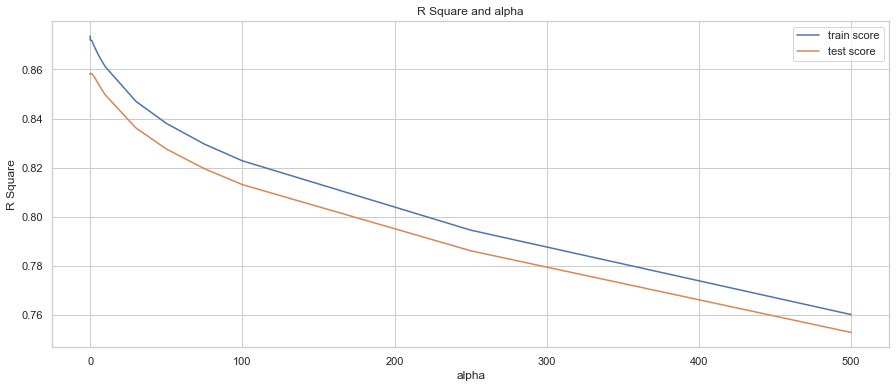

In [76]:
# plotting mean test and train scoes with alpha 
ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')

# plotting
plt.figure(figsize=(15, 6))
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R Square')
plt.title("R Square and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [77]:
# get the best estimator for lambda
ridge_model_cv.best_estimator_

Ridge(alpha=0.6)

In [78]:
# Best score for ridge
ridge_model_cv.best_score_

0.8584177190437063

In [79]:
# best alpha parameter for ridge model
ridge_model_cv.best_params_

{'alpha': 0.6}

Using the Ridge model testing for the test data

In [80]:
# building ridge with the optimal alpha value
alpha = 0.6
ridge = Ridge(alpha=alpha)
ridge.fit(X_train_rfe, y_train)

ridge.coef_

array([ 0.06062232,  0.00942962,  0.01008368,  0.07886887,  0.02948087,
        0.05619809, -0.01060198,  0.06983561, -0.0483291 , -0.0483291 ,
       -0.23050289, -0.16497301, -0.10964194, -0.05107903,  0.01046648,
        0.15143177,  0.24154582,  0.36324404,  0.38375055, -0.19646601,
       -0.09607588,  0.00303018,  0.15490686,  0.14095887,  0.2008246 ,
        0.19778478,  0.18927838, -0.0441013 , -0.0441013 ,  0.06788204,
        0.06788204, -0.00827888,  0.09543132, -0.00827888,  0.0106634 ,
        0.01428278,  0.01363323, -0.03857941, -0.08265041, -0.08265041,
       -0.03082269,  0.01276904,  0.03830896,  0.06239511, -0.03082269,
        0.01276904,  0.03830896,  0.06239511,  0.01276904,  0.03830896])

In [81]:
# Predicting for train set
y_pred_train = ridge.predict(X_train_rfe)

# predicting for the test set
y_pred_test = ridge.predict(X_test_rfe)

### R Squared for Ridge Model

In [82]:
# r2 for train and test
print('R2 for Train set: ', r2_score(y_train, y_pred_train))
print('R2 for Test set: ', r2_score(y_test, y_pred_test))

R2 for Train set:  0.8711703762706969
R2 for Test set:  0.8078291189288945


### Mean Squared Error for Ridge Model

In [83]:
# MSE for train and test
print('MSE for Train set: ', mean_squared_error(y_train, y_pred_train))
print('MSE for Test set: ', mean_squared_error(y_test, y_pred_test))

MSE for Train set:  0.018772985197773814
MSE for Test set:  0.036958432538498336


In [84]:
# Creating a dataframe with features and coefficients
ridge_df = pd.DataFrame({'Features':X_train_rfe.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df

,Features,Coefficient
0,BsmtFinSF1,0.06
1,BsmtFinSF2,0.01
2,BsmtUnfSF,0.01
3,TotalBsmtSF,0.08
4,1stFlrSF,0.03
5,2ndFlrSF,0.06
6,LowQualFinSF,-0.01
7,GrLivArea,0.07
8,MSSubClass_90,-0.05
9,BldgType_Duplex,-0.05


In [85]:
# Assignong the features and their coefficient values to a dictionary for plotting the bar plot
ridge_coeff_dict = dict(pd.Series(ridge.coef_.round(4), index = X_train_rfe.columns))
ridge_coeff_dict

{'BsmtFinSF1': 0.0606,
 'BsmtFinSF2': 0.0094,
 'BsmtUnfSF': 0.0101,
 'TotalBsmtSF': 0.0789,
 '1stFlrSF': 0.0295,
 '2ndFlrSF': 0.0562,
 'LowQualFinSF': -0.0106,
 'GrLivArea': 0.0698,
 'MSSubClass_90': -0.0483,
 'BldgType_Duplex': -0.0483,
 'OverallQual_2': -0.2305,
 'OverallQual_3': -0.165,
 'OverallQual_4': -0.1096,
 'OverallQual_5': -0.0511,
 'OverallQual_6': 0.0105,
 'OverallQual_7': 0.1514,
 'OverallQual_8': 0.2415,
 'OverallQual_9': 0.3632,
 'OverallQual_10': 0.3838,
 'OverallCond_2': -0.1965,
 'OverallCond_3': -0.0961,
 'OverallCond_4': 0.003,
 'OverallCond_5': 0.1549,
 'OverallCond_6': 0.141,
 'OverallCond_7': 0.2008,
 'OverallCond_8': 0.1978,
 'OverallCond_9': 0.1893,
 'Exterior1st_CBlock': -0.0441,
 'Exterior2nd_CBlock': -0.0441,
 'BsmtQual_None': 0.0679,
 'BsmtFinType1_None': 0.0679,
 'BedroomAbvGr_8': -0.0083,
 'TotRmsAbvGrd_12': 0.0954,
 'TotRmsAbvGrd_14': -0.0083,
 'Fireplaces_1': 0.0107,
 'Fireplaces_2': 0.0143,
 'Fireplaces_3': 0.0136,
 'FireplaceQu_None': -0.0386,
 'Gara

##### Using RFE to select optimal features

In [86]:
# RFE to minimise the features to 20
X_train_ridge = X_train_rfe[ridge_df.Features]

lm = LinearRegression()
lm.fit(X_train_ridge, y_train)

# running RFE
rfe = RFE(lm, 20)            
rfe = rfe.fit(X_train_ridge, y_train)

In [87]:
# selected Variables
list(zip(X_train_ridge.columns, rfe.ranking_, rfe.support_))

[('BsmtFinSF1', 1, True),
 ('BsmtFinSF2', 1, True),
 ('BsmtUnfSF', 1, True),
 ('TotalBsmtSF', 1, True),
 ('1stFlrSF', 6, False),
 ('2ndFlrSF', 2, False),
 ('LowQualFinSF', 27, False),
 ('GrLivArea', 26, False),
 ('MSSubClass_90', 10, False),
 ('BldgType_Duplex', 4, False),
 ('OverallQual_2', 1, True),
 ('OverallQual_3', 1, True),
 ('OverallQual_4', 1, True),
 ('OverallQual_5', 1, True),
 ('OverallQual_6', 1, True),
 ('OverallQual_7', 1, True),
 ('OverallQual_8', 1, True),
 ('OverallQual_9', 1, True),
 ('OverallQual_10', 1, True),
 ('OverallCond_2', 1, True),
 ('OverallCond_3', 1, True),
 ('OverallCond_4', 1, True),
 ('OverallCond_5', 16, False),
 ('OverallCond_6', 14, False),
 ('OverallCond_7', 30, False),
 ('OverallCond_8', 29, False),
 ('OverallCond_9', 28, False),
 ('Exterior1st_CBlock', 1, True),
 ('Exterior2nd_CBlock', 8, False),
 ('BsmtQual_None', 9, False),
 ('BsmtFinType1_None', 1, True),
 ('BedroomAbvGr_8', 18, False),
 ('TotRmsAbvGrd_12', 31, False),
 ('TotRmsAbvGrd_14', 15, 

In [88]:
# Columns where rfe support is true
X_train_ridge.columns[rfe.support_]

Index(['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'OverallQual_2',
       'OverallQual_3', 'OverallQual_4', 'OverallQual_5', 'OverallQual_6',
       'OverallQual_7', 'OverallQual_8', 'OverallQual_9', 'OverallQual_10',
       'OverallCond_2', 'OverallCond_3', 'OverallCond_4', 'Exterior1st_CBlock',
       'BsmtFinType1_None', 'GarageType_None', 'GarageFinish_None'],
      dtype='object')

##### Selecting RFE selected columns for Test and Train set

In [89]:
X_train_ridge_rfe = X_train_ridge[X_train_ridge.columns[rfe.support_]]
X_test_ridge_rfe = X_test_rfe[X_test_rfe.columns[rfe.support_]]
print("Train set after RFE: ", X_train_ridge_rfe.shape)
print("Test set after RFE: ", X_test_ridge_rfe.shape)

Train set after RFE:  (1080, 20)
Test set after RFE:  (361, 20)


In [90]:
ridge = Ridge()

# cross validation
folds = KFold(n_splits=5, shuffle=True, random_state=100)

ridge_model_cv = GridSearchCV(
    estimator=ridge, param_grid=params, scoring='r2', cv=folds, return_train_score=True, verbose = 1
)
ridge_model_cv.fit(X_train_ridge_rfe, y_train)

Fitting 5 folds for each of 31 candidates, totalling 155 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 155 out of 155 | elapsed:    0.9s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5,
                                   6, 7, 8, 9, 10, 30, 50, 75, 100, 250, 500,
                                   750, ...]},
             return_train_score=True, scoring='r2', verbose=1)

In [91]:
# display the mean scores
ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results = ridge_cv_results[ridge_cv_results['param_alpha']<=100]
ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
6,0.30,0.77,0.75,1
7,0.40,0.77,0.75,2
5,0.20,0.77,0.75,3
8,0.50,0.77,0.75,4
9,0.60,0.77,0.75,5
4,0.10,0.77,0.75,6
10,0.70,0.76,0.75,7
11,0.80,0.76,0.75,8
3,0.01,0.77,0.75,9
12,0.90,0.76,0.75,10


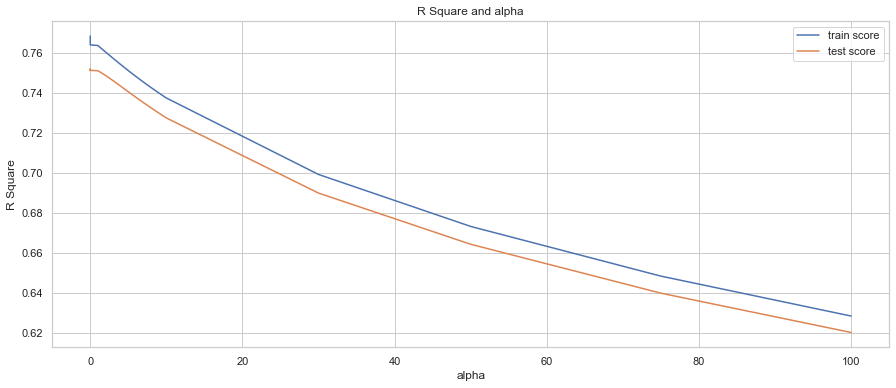

In [92]:
# plotting mean test and train scoes with alpha 
ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')

# plotting
plt.figure(figsize=(15, 6))
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R Square')
plt.title("R Square and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [93]:
# get the best estimator for lambda
ridge_model_cv.best_estimator_

Ridge(alpha=0.3)

In [94]:
# Best score for ridge
ridge_model_cv.best_score_

0.752143624463716

In [95]:
# best alpha parameter for ridge model
ridge_model_cv.best_params_

{'alpha': 0.3}

In [96]:
# building ridge with the optimal alpha value
alpha = 0.6
ridge = Ridge(alpha=alpha)
ridge.fit(X_train_ridge_rfe, y_train)

ridge.coef_

array([ 0.06293646,  0.01486269,  0.01595156,  0.08998303, -0.39022881,
       -0.29545171, -0.22564576, -0.12479108,  0.03057667,  0.26073245,
        0.43382158,  0.60329517,  0.76688298, -0.28176757, -0.22333183,
       -0.11207594, -0.06425808,  0.19789434, -0.09652885, -0.09652885])

##### Using Optimized Ridge model to predict test data

In [97]:
# predicting from the train set
y_pred_train = ridge.predict(X_train_ridge_rfe)
y_train_pred_ridge = y_pred_train

# predicting from the test set
y_pred_test = ridge.predict(X_test_ridge_rfe)
y_pred_test_ridge = y_pred_test

### R Squared for Ridge Model

In [98]:
# r2 for train and test
print('R2 for Train set: ', r2_score(y_train, y_pred_train))
print('R2 for Test set: ', r2_score(y_test, y_pred_test))

R2 for Train set:  0.7642032631727629
R2 for Test set:  0.7452748417729844


### Adjusted R Squared for Ridge Model

In [99]:
tr_adj_r2 = (1 - (1-r2_score(y_train, y_pred_train)) * ((X_train_ridge_rfe.shape[0]-1) / (X_train_ridge_rfe.shape[0] - X_train_ridge_rfe.shape[1] - 1)))
tr_adj_r2

0.7597500670098312

In [100]:
adj_r2 = (1 - (1-r2_score(y_test, y_pred_test)) * ((X_test_ridge_rfe.shape[0]-1) / (X_test_ridge_rfe.shape[0] - X_test_ridge_rfe.shape[1] - 1)))
adj_r2

0.7302910089361012

### Mean Squared Error for Ridge Model

In [101]:
# MSE for train and test
print('MSE for Train set: ', mean_squared_error(y_train, y_pred_train))
print('MSE for Test set: ', mean_squared_error(y_test, y_pred_test))

MSE for Train set:  0.034360176813387905
MSE for Test set:  0.0489889130117902


In [102]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0, ridge.intercept_)
cols = X_train_ridge_rfe.columns
cols.insert(0, 'constant')
ridge_coef = pd.DataFrame(list(zip(cols, model_parameter)))
ridge_coef.columns = ['Feaure', 'Coef']

In [103]:
# best coefficients of Ridge model
ridge_coef.sort_values(by='Coef',ascending=False)

,Feaure,Coef
0,BsmtFinSF1,11.95
13,OverallCond_2,0.77
12,OverallQual_10,0.60
11,OverallQual_9,0.43
10,OverallQual_8,0.26
18,GarageType_None,0.20
4,OverallQual_2,0.09
1,BsmtFinSF2,0.06
9,OverallQual_7,0.03
3,TotalBsmtSF,0.02


## Model Building using Lasso

In [104]:
# Instantiating Lasso model
lasso = Lasso()

In [105]:
# list of alphas
params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01, 0.02, 0.03, 0.05]}

In [106]:
# cross validating using Lasso model
folds = KFold(n_splits=5, shuffle=True, random_state=100)
lasso_model_cv = GridSearchCV(
    estimator=lasso, param_grid=params, scoring='r2', cv=folds, return_train_score=True, verbose=1
)            

lasso_model_cv.fit(X_train_rfe, y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:    1.1s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.01,
                                   0.02, 0.03, 0.05]},
             return_train_score=True, scoring='r2', verbose=1)

In [107]:
# display the results
lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by=['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
0,0.00,0.87,0.86,1
1,0.00,0.87,0.86,2
2,0.00,0.87,0.86,3
3,0.00,0.87,0.86,4
4,0.00,0.87,0.86,5
5,0.00,0.86,0.85,6
6,0.00,0.85,0.84,7
7,0.00,0.84,0.83,8
8,0.00,0.83,0.82,9
9,0.01,0.82,0.81,10


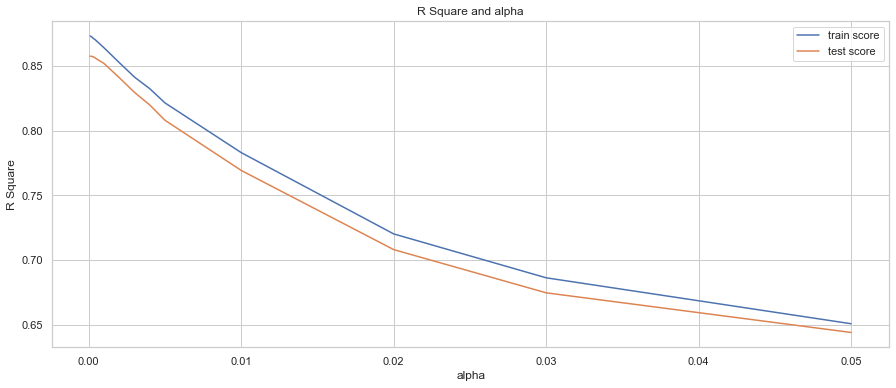

In [108]:
# plotting mean test and train scores with alpha 
lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float64')

# plotting line graph
plt.figure(figsize=(15, 6))
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R Square')

plt.title("R Square and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [109]:
# get the best estimator for lambda for Lasso model
lasso_model_cv.best_estimator_

Lasso(alpha=0.0001)

In [110]:
# Best score for ridge
lasso_model_cv.best_score_

0.8574078800085253

In [111]:
# best alpha parameter for ridge model
lasso_model_cv.best_params_

{'alpha': 0.0001}

In [112]:
# building ridge with the optimal alpha value
alpha = 0.0001
lasso = Lasso(alpha=alpha)
lasso.fit(X_train_rfe, y_train)

lasso.coef_

array([ 5.10897760e-02,  5.78473188e-03, -0.00000000e+00,  8.55321509e-02,
        3.59236633e-02,  6.21346847e-02, -9.69927593e-03,  6.20463733e-02,
       -9.00839535e-02, -0.00000000e+00, -2.00800754e-01, -1.13107967e-01,
       -5.85599702e-02,  0.00000000e+00,  6.23349858e-02,  2.05548914e-01,
        2.98469286e-01,  4.26120768e-01,  4.58127972e-01, -2.02677287e-01,
       -9.53615276e-02, -0.00000000e+00,  1.50124876e-01,  1.36111880e-01,
        1.96401579e-01,  1.93269309e-01,  1.82256739e-01, -5.46037038e-03,
       -0.00000000e+00,  1.24669589e-01,  8.96191425e-18, -0.00000000e+00,
        8.60922194e-02, -0.00000000e+00, -0.00000000e+00,  1.94332123e-03,
        0.00000000e+00, -4.95638074e-02, -2.02151788e-01, -1.70204968e-14,
       -9.92232285e-02,  0.00000000e+00,  7.18642746e-02,  4.59189270e-02,
       -2.35445981e-05,  0.00000000e+00,  1.32117492e-03,  1.29698272e-03,
        0.00000000e+00,  2.71904135e-06])

In [113]:
# predicting for test and train data
y_train_pred = lasso.predict(X_train_rfe)
y_test_pred = lasso.predict(X_test_rfe)

### R Squared for Lasso Model

In [114]:
# r2 for train and test
print('R2 for Train set: ', r2_score(y_true=y_train, y_pred=y_train_pred))
print('R2 for Test set: ', r2_score(y_true=y_test, y_pred=y_test_pred))

R2 for Train set:  0.8713373819913969
R2 for Test set:  0.8085542533383383


### Mean Squared Error for Lasso Model

In [115]:
# MSE for train and test
print('MSE for Train set: ', mean_squared_error(y_train, y_train_pred))
print('MSE for Test set: ', mean_squared_error(y_test, y_test_pred))

MSE for Train set:  0.018748649211749107
MSE for Test set:  0.03681897420327399


In [116]:
# fetchimg the coefficients of lasso model
model_param = list(lasso.coef_)
model_param.insert(0, lasso.intercept_)
cols = X_train_rfe.columns
cols.insert(0, 'const')
lasso_coef = pd.DataFrame(list(zip(cols, model_param)))
lasso_coef.columns = ['Featuere','Coef']

In [117]:
# printing the coefficients of the lasso model
lasso_coef.sort_values(by='Coef',ascending=False)

,Featuere,Coef
0,BsmtFinSF1,11.82
19,OverallCond_2,0.46
18,OverallQual_10,0.43
17,OverallQual_9,0.30
16,OverallQual_8,0.21
25,OverallCond_8,0.20
26,OverallCond_9,0.19
27,Exterior1st_CBlock,0.18
23,OverallCond_6,0.15
24,OverallCond_7,0.14


In [118]:
# Creating a dataframe with features and coefficients
lasso_df = pd.DataFrame({'Features':X_train_rfe.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df.reset_index(drop=True, inplace=True)
lasso_df

,Features,Coefficient
0,BsmtFinSF1,0.05
1,BsmtFinSF2,0.01
2,BsmtUnfSF,-0.00
3,TotalBsmtSF,0.09
4,1stFlrSF,0.04
5,2ndFlrSF,0.06
6,LowQualFinSF,-0.01
7,GrLivArea,0.06
8,MSSubClass_90,-0.09
9,BldgType_Duplex,-0.00


##### Using RFE to select optimal features for Lasso model

In [119]:
# RFE to minimise the features to 20
X_train_lasso = X_train_rfe[lasso_df.Features]

lm = LinearRegression()
lm.fit(X_train_lasso, y_train)

# running RFE
rfe = RFE(lm, 20)            
rfe = rfe.fit(X_train_lasso, y_train)

In [120]:
# selected Variables
list(zip(X_train_lasso.columns, rfe.ranking_, rfe.support_))

[('BsmtFinSF1', 1, True),
 ('BsmtFinSF2', 1, True),
 ('BsmtUnfSF', 1, True),
 ('TotalBsmtSF', 1, True),
 ('1stFlrSF', 6, False),
 ('2ndFlrSF', 2, False),
 ('LowQualFinSF', 27, False),
 ('GrLivArea', 26, False),
 ('MSSubClass_90', 10, False),
 ('BldgType_Duplex', 4, False),
 ('OverallQual_2', 1, True),
 ('OverallQual_3', 1, True),
 ('OverallQual_4', 1, True),
 ('OverallQual_5', 1, True),
 ('OverallQual_6', 1, True),
 ('OverallQual_7', 1, True),
 ('OverallQual_8', 1, True),
 ('OverallQual_9', 1, True),
 ('OverallQual_10', 1, True),
 ('OverallCond_2', 1, True),
 ('OverallCond_3', 1, True),
 ('OverallCond_4', 1, True),
 ('OverallCond_5', 16, False),
 ('OverallCond_6', 14, False),
 ('OverallCond_7', 30, False),
 ('OverallCond_8', 29, False),
 ('OverallCond_9', 28, False),
 ('Exterior1st_CBlock', 1, True),
 ('Exterior2nd_CBlock', 8, False),
 ('BsmtQual_None', 9, False),
 ('BsmtFinType1_None', 1, True),
 ('BedroomAbvGr_8', 18, False),
 ('TotRmsAbvGrd_12', 31, False),
 ('TotRmsAbvGrd_14', 15, 

In [121]:
# Columns where rfe support is true
X_train_lasso.columns[rfe.support_]

Index(['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'OverallQual_2',
       'OverallQual_3', 'OverallQual_4', 'OverallQual_5', 'OverallQual_6',
       'OverallQual_7', 'OverallQual_8', 'OverallQual_9', 'OverallQual_10',
       'OverallCond_2', 'OverallCond_3', 'OverallCond_4', 'Exterior1st_CBlock',
       'BsmtFinType1_None', 'GarageType_None', 'GarageFinish_None'],
      dtype='object')

##### Selecting RFE selected columns for Test and Train set

In [122]:
X_train_lasso_rfe = X_train_lasso[X_train_lasso.columns[rfe.support_]]
X_test_lasso_rfe = X_test_rfe[X_test_rfe.columns[rfe.support_]]
print("Train set after RFE: ", X_train_lasso_rfe.shape)
print("Test set after RFE: ", X_test_lasso_rfe.shape)

Train set after RFE:  (1080, 20)
Test set after RFE:  (361, 20)


In [123]:
# cross validating using Lasso model
folds = KFold(n_splits=5, shuffle=True, random_state=100)
lasso_model_cv = GridSearchCV(
    estimator=lasso, param_grid=params, scoring='r2', cv=folds, return_train_score=True, verbose=1
)            

lasso_model_cv.fit(X_train_lasso_rfe, y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:    0.5s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=Lasso(alpha=0.0001),
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.01,
                                   0.02, 0.03, 0.05]},
             return_train_score=True, scoring='r2', verbose=1)

In [124]:
# display the results
lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by=['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
0,0.00,0.77,0.75,1
2,0.00,0.77,0.75,2
1,0.00,0.77,0.75,3
3,0.00,0.77,0.75,4
4,0.00,0.76,0.75,5
5,0.00,0.76,0.75,6
6,0.00,0.75,0.74,7
7,0.00,0.73,0.72,8
8,0.00,0.71,0.70,9
9,0.01,0.70,0.68,10


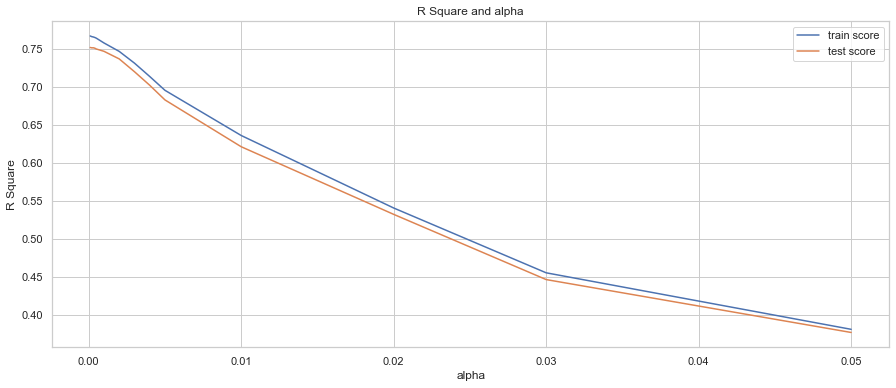

In [125]:
# plotting mean test and train scores with alpha 
lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float64')

# plotting line graph
plt.figure(figsize=(15, 6))
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R Square')

plt.title("R Square and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [126]:
# get the best estimator for lambda for Lasso model
lasso_model_cv.best_estimator_

Lasso(alpha=0.0001)

In [127]:
# Best score for ridge
lasso_model_cv.best_score_

0.7523641971052472

In [128]:
# best alpha parameter for ridge model
lasso_model_cv.best_params_

{'alpha': 0.0001}

In [129]:
# building ridge with the optimal alpha value
alpha = 0.0001
lasso = Lasso(alpha=alpha)
lasso.fit(X_train_lasso_rfe, y_train)

lasso.coef_

array([ 5.30469010e-02,  1.13530677e-02,  5.40257248e-03,  9.67800633e-02,
       -2.32876356e-01, -7.39030162e-02, -0.00000000e+00,  1.04089806e-01,
        2.60481386e-01,  4.92432341e-01,  6.68603424e-01,  8.47690449e-01,
        1.04077441e+00, -2.98728082e-01, -2.19771115e-01, -1.08428096e-01,
       -0.00000000e+00,  1.93868441e-01, -1.85456965e-01, -1.21030158e-14])

In [130]:
# predicting for test and train data
y_train_pred = lasso.predict(X_train_lasso_rfe)
y_train_pred_lasso = y_train_pred
y_test_pred = lasso.predict(X_test_lasso_rfe)
y_test_pred_lasso = y_test_pred

### R Squared for Lasso Model

In [131]:
# r2 for train and test
print('R2 for Train set: ', r2_score(y_true=y_train, y_pred=y_train_pred))
print('R2 for Test set: ', r2_score(y_true=y_test, y_pred=y_test_pred))

R2 for Train set:  0.7660781654126534
R2 for Test set:  0.7494399881299976


### Adjusted R Squared for Ridge Model

In [132]:
tr_adj_r2 = (1 - (1-r2_score(y_true=y_train, y_pred=y_train_pred)) * ((X_train_lasso_rfe.shape[0]-1) / (X_train_lasso_rfe.shape[0] - X_train_lasso_rfe.shape[1] - 1)))
tr_adj_r2

0.761660378168322

In [133]:
ts_adj_r2 = (1 - (1-r2_score(y_true=y_test, y_pred=y_test_pred)) * ((X_test_lasso_rfe.shape[0]-1) / (X_test_lasso_rfe.shape[0] - X_test_lasso_rfe.shape[1] - 1)))
ts_adj_r2

0.7347011639023504

### Mean Squared Error for Lasso Model

In [134]:
# MSE for train and test
print('MSE for Train set: ', mean_squared_error(y_train, y_train_pred))
print('MSE for Test set: ', mean_squared_error(y_test, y_test_pred))

MSE for Train set:  0.034086967042390726
MSE for Test set:  0.04818786927513959


In [135]:
# fetching the coefficients of lasso model
model_param = list(lasso.coef_)
model_param.insert(0, lasso.intercept_)
cols = X_test_lasso_rfe.columns
cols.insert(0, 'const')
lasso_coef = pd.DataFrame(list(zip(cols, model_param)))
lasso_coef.columns = ['Featuere','Coef']

In [136]:
# printing the coefficients of the lasso model
lasso_coef.sort_values(by='Coef',ascending=False)

,Featuere,Coef
0,BsmtFinSF1,11.72
13,OverallCond_2,1.04
12,OverallQual_10,0.85
11,OverallQual_9,0.67
10,OverallQual_8,0.49
9,OverallQual_7,0.26
18,GarageType_None,0.19
8,OverallQual_6,0.10
4,OverallQual_2,0.10
1,BsmtFinSF2,0.05


# Conclusion
## Ridge Model

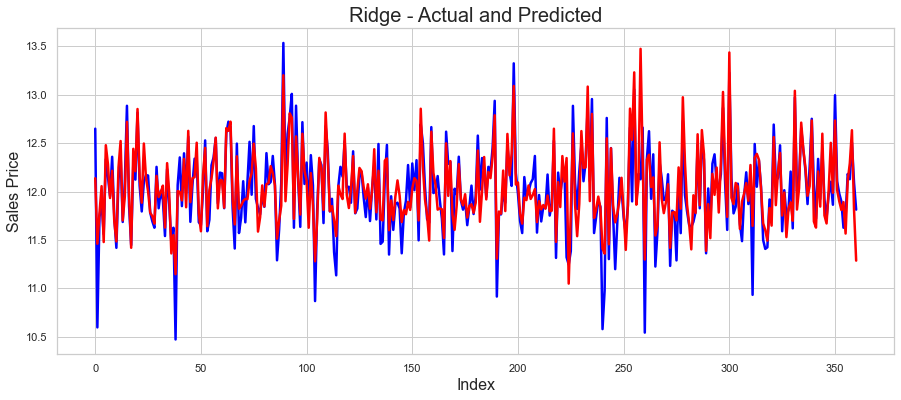

In [137]:
# Ridge Model results: Actual vs Predicted
plt.figure(figsize=(15, 6))
a = [i for i in range(0, y_test.shape[0],1)]
plt.plot(a, y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(a, y_pred_test_ridge, color="red", linewidth=2.5, linestyle="-")
plt.title('Ridge - Actual and Predicted', fontsize=20)
plt.xlabel('Index', fontsize=16)
plt.ylabel('Sales Price', fontsize=16)
plt.show()

## Lasso Model

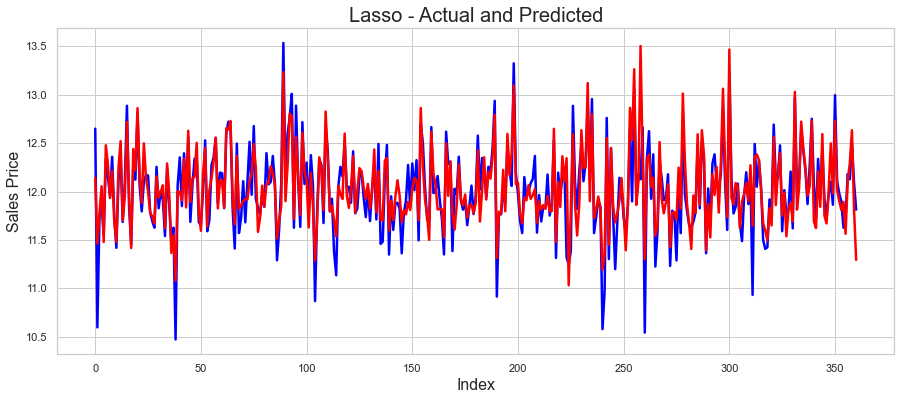

In [138]:
# Lasso Model results: Actual vs Predicted
plt.figure(figsize=(15, 6))
a = [i for i in range(0, y_test.shape[0],1)]
plt.plot(a, y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(a, y_test_pred_lasso, color="red", linewidth=2.5, linestyle="-")
plt.title('Lasso - Actual and Predicted', fontsize=20)
plt.xlabel('Index', fontsize=16)
plt.ylabel('Sales Price', fontsize=16)
plt.show()

## Observations

##### The __optimal Lambda value__ for Ridge and Lasso are:
- __Ridge__ = 0.3
- __Lasso__ = 0.0001

##### The __R Squared value__ for Ridge and Lasso are:
- __Ridge__

| Measurement | Train Dataset | Test Dataset | __Difference__ |
| :- | :-: | :-: | -: |
| R-Squared | 76.42% | 74.53% | __1.89%__ |
| Adj R-Squared | 75.97% | 73.02% | __2.95%__ |

- __Lasso__

| Measurement | Train Dataset | Test Dataset | __Difference__ |
| :- | :-: | :-: | -: |
| R-Squared | 76.61% | 74.95% | __1.66%__ |
| Adj R-Squared | 76.16% | 73.47% | __2.69%__ |

##### The Mean Square Error for Ridge and Lasso are:
- __Ridge__ = 0.0489
- __Lasso__ = 0.0482

The Mean Squared Error of Lasso is __slightly lower__ than that of Ridge model.
<br>
Also, since Lasso helps in feature reduction (as the coefficient value of one of the feature became 0), __Lasso has a better edge over Ridge__.

##### Based on the coefficients, the Major influencers of Sale Pricing are:
- OverallCond
- MSZoning
- MSSubClass
- TotalBsmtSF
- GarageType
- SaleCondition
- KitchenQual
- BsmtExposure
- BsmtFinType1
- GarageFinish
- Exterior1st